In [31]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import fft, signal

plt.rcParams['figure.figsize'] = (20, 10)

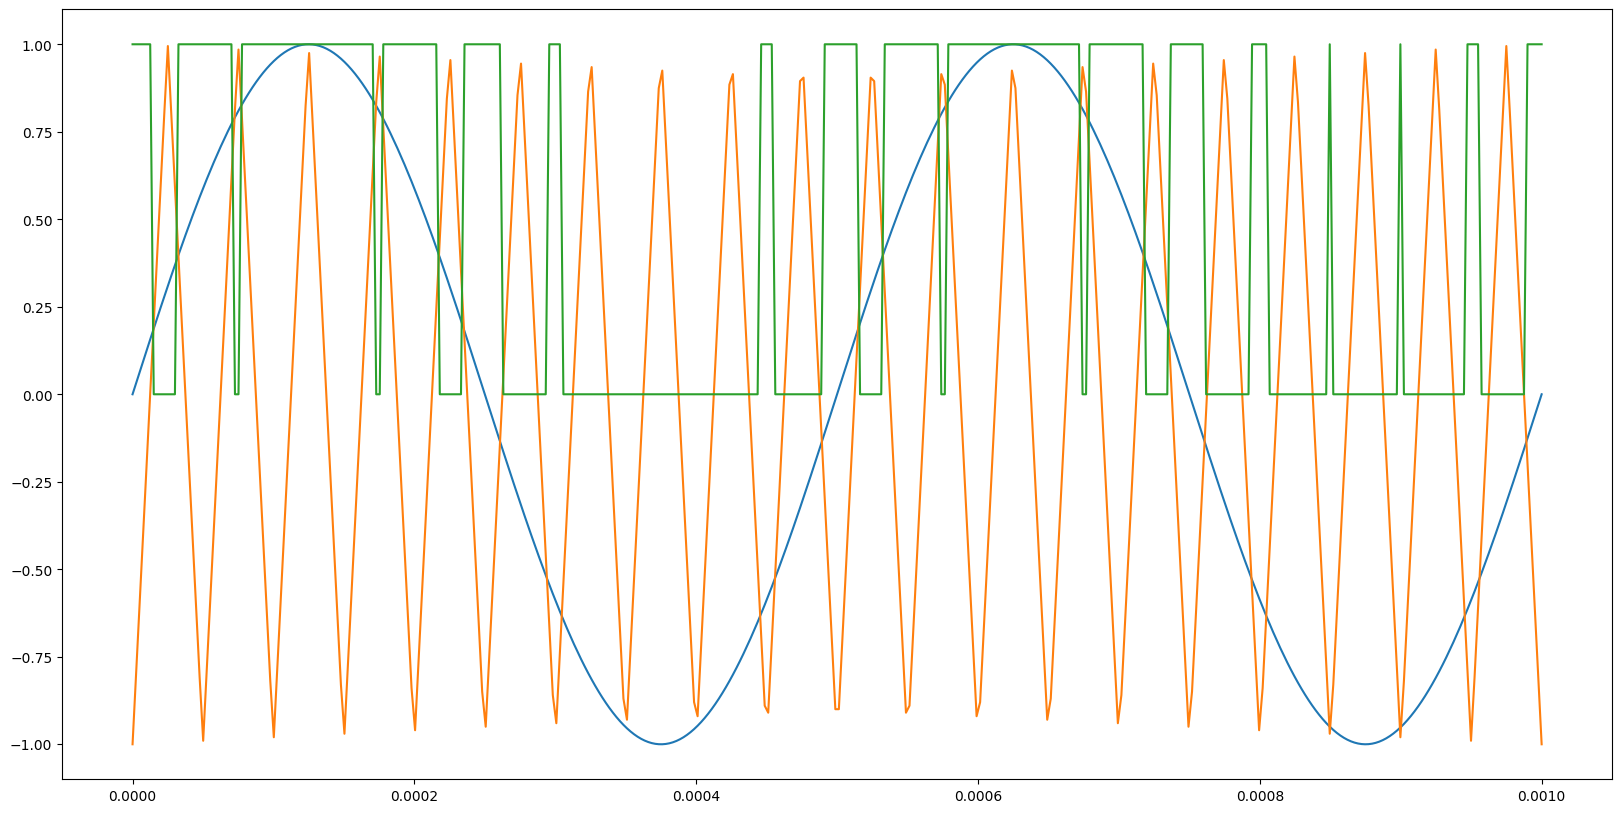

In [40]:
# Number of samplepoints
N = 400
# sample spacing
T = 1.0 / 400000.0

t = np.linspace(0.0, N * T, N)

# Audio wave
fa = np.sin(2.0 * np.pi * t * 2000.0)

# Triangle wave
ftr = signal.sawtooth(20000.0 * 2.0 * np.pi * t, 0.5)

# Modulated PWM
fp = [ 1 if a >= tr else 0 for a, tr in zip(fa, ftr) ]

plt.plot(t, fa, t, ftr, t, fp)
plt.show()

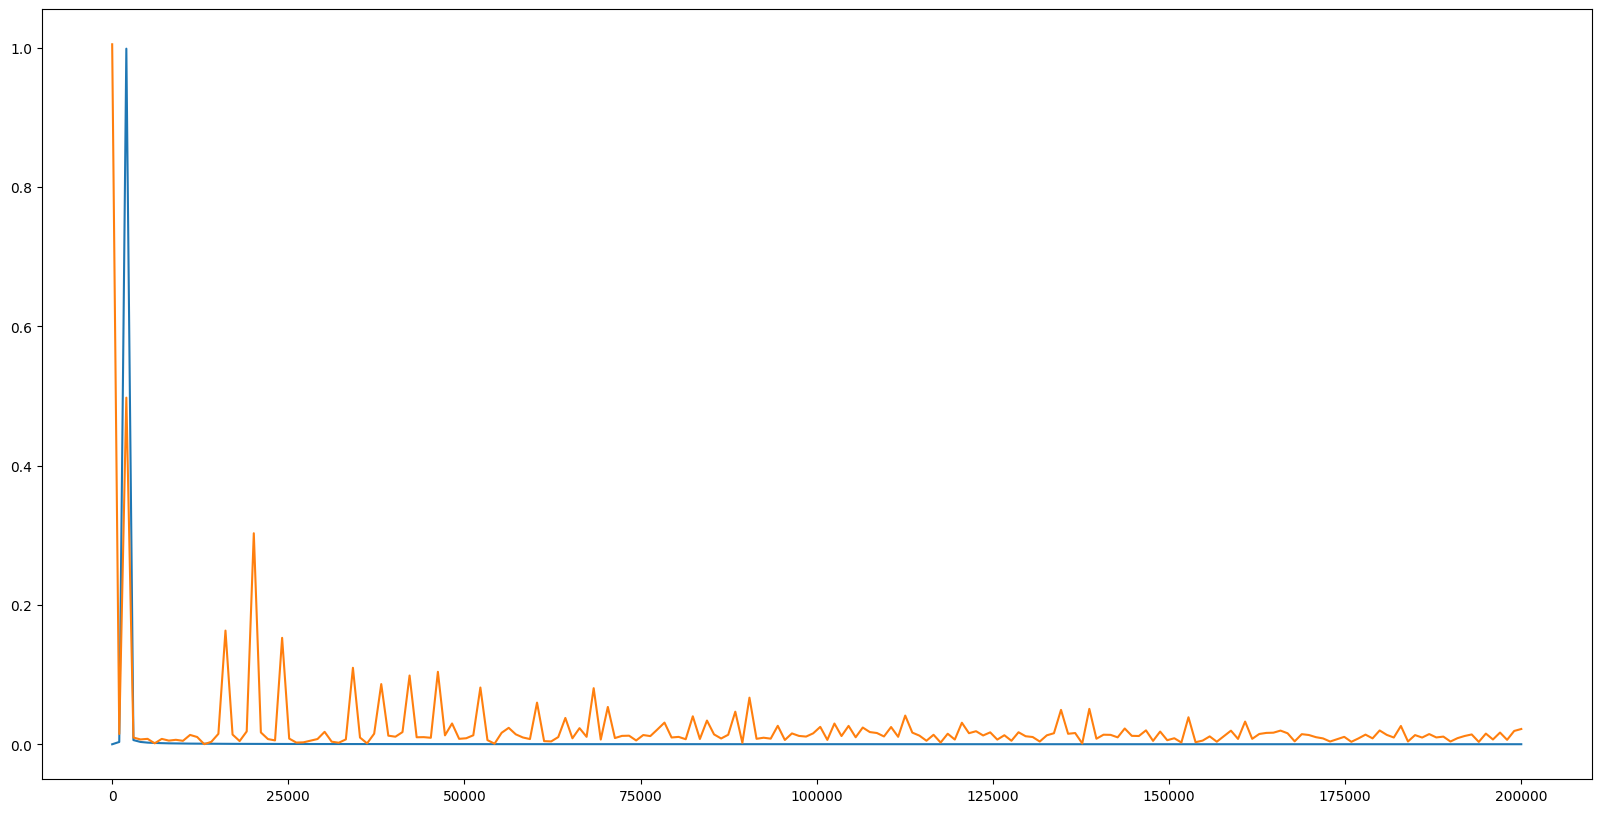

In [45]:
xf = np.linspace(0.0, 1.0 / (2.0 * T), N // 2)

faf = fft.fft(fa)
fpf = fft.fft(fp)

plt.plot(xf, 2.0 / N * np.abs(faf[:N // 2]), xf, 2.0 / N * np.abs(fpf[:N // 2]))
plt.show()